In [1]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('dados_combinados.csv')

# Agregar o número de óbitos por mês e ano
df['DATA'] = pd.to_datetime(df['ANO_OBITO'].astype(str) + '-' + df['MES_OBITO'].astype(str))
series_temporal = df.groupby('DATA').size()

# Visualizar a série temporal
print(series_temporal)

DATA
2010-01-01    6399
2010-02-01    5798
2010-03-01    6030
2010-04-01    6084
2010-05-01    6706
              ... 
2021-08-01    8282
2021-09-01    7205
2021-10-01    7550
2021-11-01    7383
2021-12-01    8117
Length: 144, dtype: int64


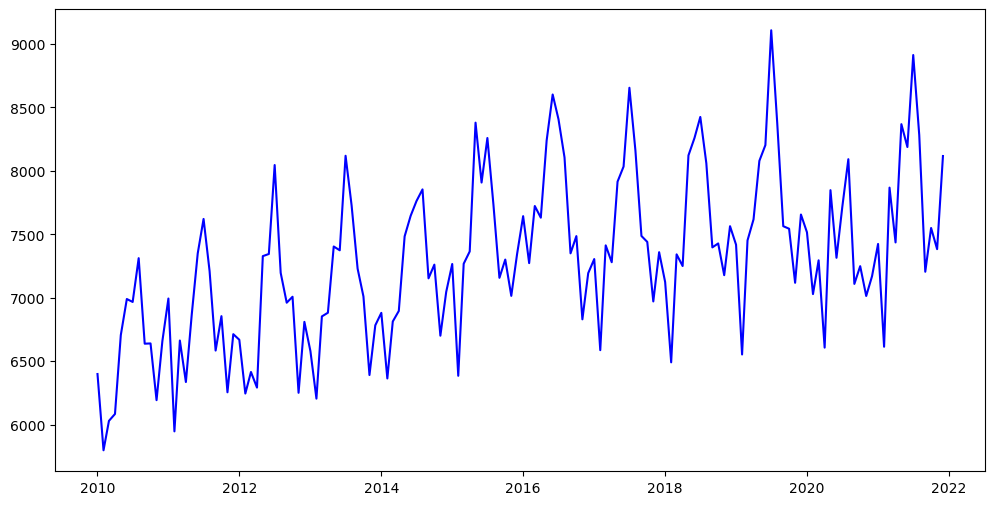

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(series_temporal.index, series_temporal, label='Série Temporal Original', color='blue')

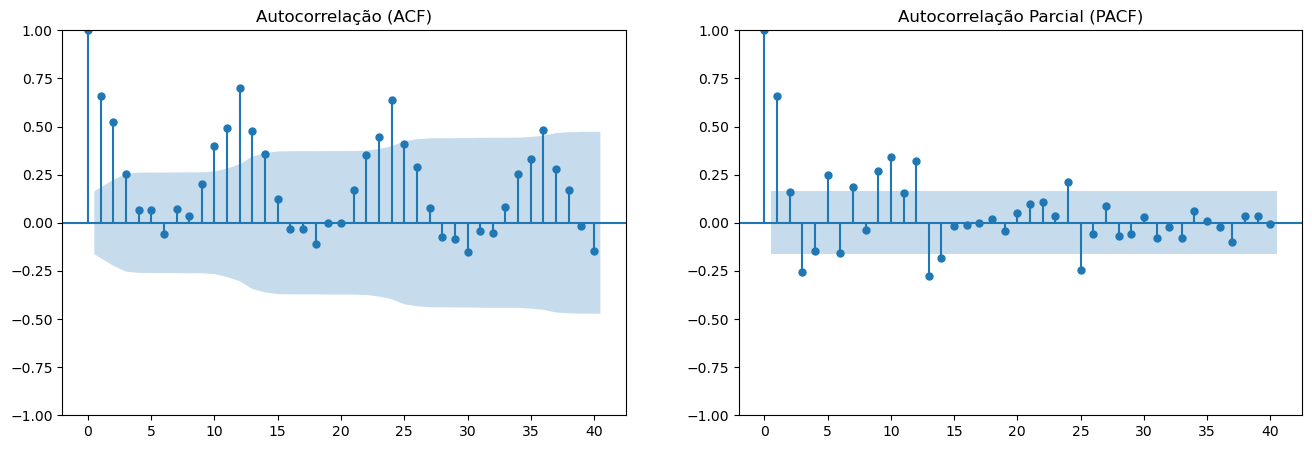

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plotando a autocorrelação (ACF) e autocorrelação parcial (PACF)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de autocorrelação
sm.graphics.tsa.plot_acf(series_temporal, lags=40, ax=axes[0])
axes[0].set_title('Autocorrelação (ACF)')

# Gráfico de autocorrelação parcial
sm.graphics.tsa.plot_pacf(series_temporal, lags=40, ax=axes[1], method='ywm')
axes[1].set_title('Autocorrelação Parcial (PACF)')

plt.show()

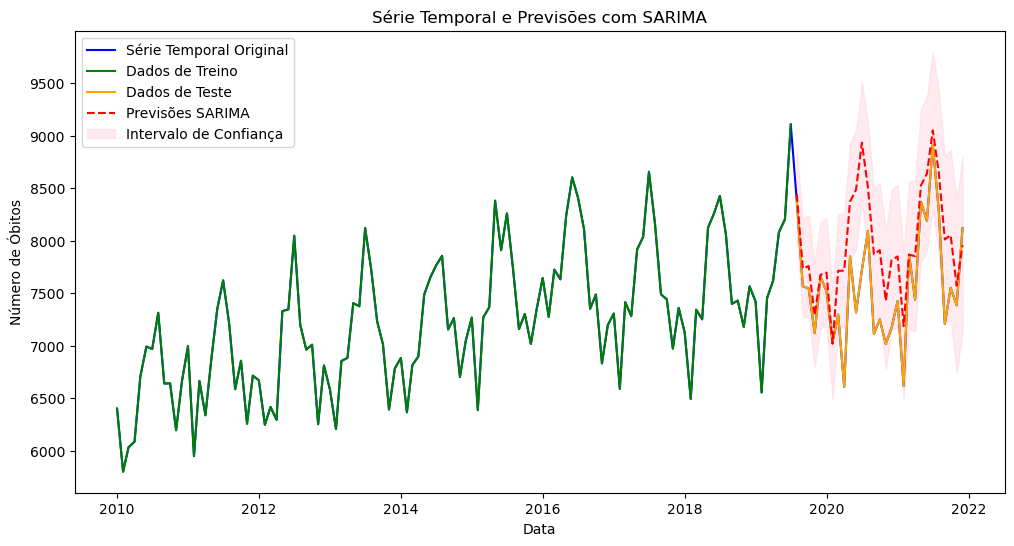

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Carregar os dados
df = pd.read_csv('dados_combinados.csv')

# Criar a coluna de data
df['DATA'] = pd.to_datetime(df['ANO_OBITO'].astype(str) + '-' + df['MES_OBITO'].astype(str))

# Agregar o número de óbitos por mês
series_temporal = df.groupby('DATA').size()

# Definir a frequência como MS (Month Start) e preencher meses faltantes com 0
series_temporal = series_temporal.asfreq('MS', fill_value=0)

# Dividir os dados em treino e teste
train = series_temporal[:int(len(series_temporal)*0.8)]  # 80% para treino
test = series_temporal[int(len(series_temporal)*0.8):]   # 20% para teste

# Ajustar o modelo SARIMA nos dados de treino
# Ordem não sazonal: (p, d, q)
# Ordem sazonal: (P, D, Q, S) onde S é o período sazonal (12 para dados mensais)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit(disp=False)

# Fazer previsões nos dados de teste
forecast = model_fit.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean  # Média das previsões
conf_int = forecast.conf_int()  # Intervalo de confiança

# Plotar a série temporal original, os dados de treino, teste e as previsões
plt.figure(figsize=(12, 6))

# Série temporal original
plt.plot(series_temporal.index, series_temporal, label='Série Temporal Original', color='blue')

# Dados de treino
plt.plot(train.index, train, label='Dados de Treino', color='green')

# Dados de teste
plt.plot(test.index, test, label='Dados de Teste', color='orange')

# Previsões
plt.plot(test.index, forecast_mean, label='Previsões SARIMA', color='red', linestyle='--')

# Intervalo de confiança
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança')

# Adicionar título e legendas
plt.title('Série Temporal e Previsões com SARIMA')
plt.xlabel('Data')
plt.ylabel('Número de Óbitos')
plt.legend()

# Mostrar o gráfico
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error
# Calcular o MSE
mse = mean_squared_error(test, forecast_mean)
print(f'Erro Quadrático Médio (MSE): {mse}')

Erro Quadrático Médio (MSE): 291189.169951514


In [19]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test, forecast_mean) * 100
print(f'MAPE: {mape:.2f}%')


MAPE: 5.77%


Erro Quadrático Médio (MSE): 511179.189583939


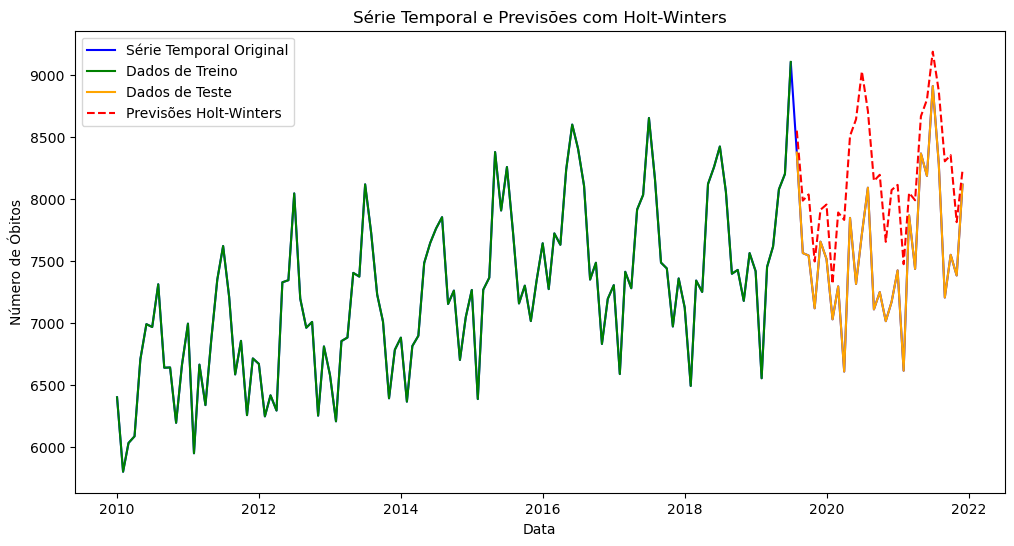

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Carregar os dados
df = pd.read_csv('dados_combinados.csv')

# Criar a coluna de data
df['DATA'] = pd.to_datetime(df['ANO_OBITO'].astype(str) + '-' + df['MES_OBITO'].astype(str))

# Agregar o número de óbitos por mês
series_temporal = df.groupby('DATA').size()

# Definir a frequência como MS (Month Start) e preencher meses faltantes com 0
series_temporal = series_temporal.asfreq('MS', fill_value=0)

# Dividir os dados em treino e teste
train = series_temporal[:int(len(series_temporal)*0.8)]  # 80% para treino
test1 = series_temporal[int(len(series_temporal)*0.8):]   # 20% para teste

# Ajustar o modelo Holt-Winters nos dados de treino
model = ExponentialSmoothing(
    train,
    trend='add',          # Tendência aditiva
    seasonal='add',       # Sazonalidade aditiva
    seasonal_periods=12   # Período sazonal (12 meses)
)
model_fit = model.fit()

# Fazer previsões nos dados de teste
forecast1 = model_fit.forecast(steps=len(test))

# Calcular o MSE
mse = mean_squared_error(test, forecast)
print(f'Erro Quadrático Médio (MSE): {mse}')

# Plotar a série temporal original, os dados de treino, teste e as previsões
plt.figure(figsize=(12, 6))

# Série temporal original
plt.plot(series_temporal.index, series_temporal, label='Série Temporal Original', color='blue')

# Dados de treino
plt.plot(train.index, train, label='Dados de Treino', color='green')

# Dados de teste
plt.plot(test.index, test, label='Dados de Teste', color='orange')

# Previsões
plt.plot(test.index, forecast, label='Previsões Holt-Winters', color='red', linestyle='--')

# Adicionar título e legendas
plt.title('Série Temporal e Previsões com Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Número de Óbitos')
plt.legend()

# Mostrar o gráfico
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test1, forecast1) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: 8.51%


In [27]:
pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   - -------------------------------------- 10.5/376.0 MB 50.1 MB/s eta 0:00:08
   -- ------------------------------------- 26.2/376.0 MB 61.5 MB/s eta 0:00:06
   ---- ----------------------------------- 40.6/376.0 MB 64.6 MB/s eta 0:00:06
   ----- ---------------------------------- 48.8/376.0 MB 57.5 MB/s eta 0:00:06
   ------ --------------------------------- 64.5/376.0 MB 60.4 MB/s eta 0:00:06
   -------- ------------------------------- 77.9/376.0 MB 61.3 MB/s eta 0:00:05
   --------- ------------------------------ 92.3/376.0 MB 62.0 MB/s eta 0:00:05
   ----------- --------------------------- 106.7/376.0 MB 62.5 MB/s eta 0:00:05
   ------------ -------------------------- 116.7/376.0 MB 60.6 MB/s eta 0:00:05
   ------------- ------------------------- 130.8/376.0 MB 61.4 MB/s eta 0:00:04
   --------------- ----------------------- 146.5/376.0 MB 62.4 MB/s eta 0:00:04
   ---------------- ---------------------- 158.9

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - loss: 0.1918 - val_loss: 0.0305
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0425 - val_loss: 0.0345
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0297 - val_loss: 0.0313
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0370 - val_loss: 0.0327
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0358 - val_loss: 0.0293
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0321 - val_loss: 0.0297
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0335 - val_loss: 0.0309
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0343 - val_loss: 0.0295
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0370 - val_loss: 0.0291
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0337 - val_loss: 0.0299
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0343 - val_loss: 0.0289
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0331 - val_loss: 0.0289

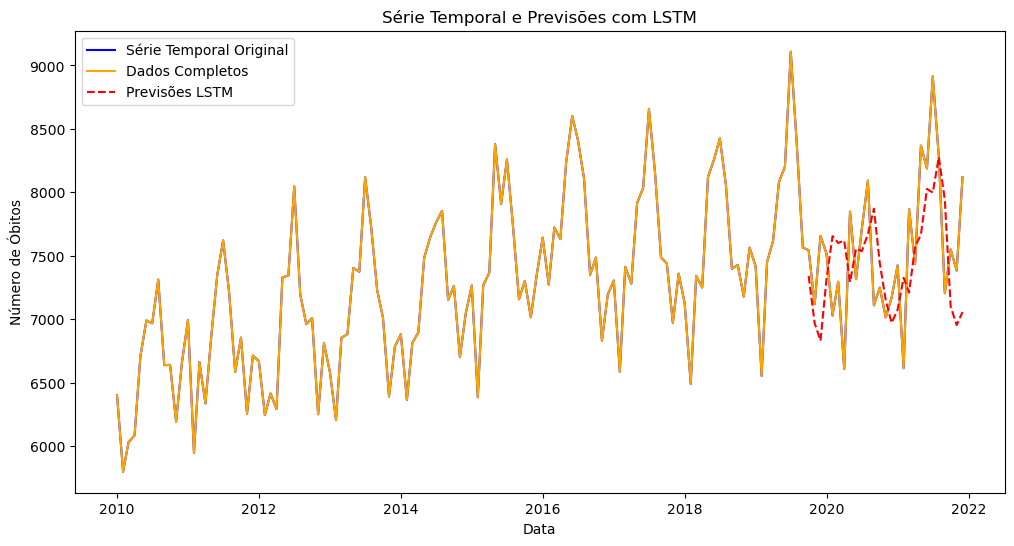

MAPE: 6.07%


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Carregar os dados
df = pd.read_csv('dados_combinados.csv')

# Criar a coluna de data
df['DATA'] = pd.to_datetime(df['ANO_OBITO'].astype(str) + '-' + df['MES_OBITO'].astype(str))

# Agregar o número de óbitos por mês
series_temporal = df.groupby('DATA').size()

# Definir a frequência como MS (Month Start) e preencher meses faltantes com 0
series_temporal = series_temporal.asfreq('MS', fill_value=0)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series_temporal.values.reshape(-1, 1))

# Criar sequências para o LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10  # Número de passos usados para prever
X, y = create_sequences(series_scaled, SEQ_LENGTH)

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Construção do modelo LSTM
model = Sequential([
    Input(shape=(SEQ_LENGTH, 1)),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compilar o modelo com o otimizador Adam
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Fazer previsões
predictions = model.predict(X_test)

# Reverter a normalização
predictions = scaler.inverse_transform(predictions)
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotar a série temporal inteira
plt.figure(figsize=(12, 6))
plt.plot(series_temporal.index, series_temporal, label='Série Temporal Original', color='blue')
plt.plot(series_temporal.index, series_temporal, label='Dados Completos', color='orange')
plt.plot(series_temporal.index[-len(y_test):], predictions, label='Previsões LSTM', color='red', linestyle='--')
plt.title('Série Temporal e Previsões com LSTM')
plt.xlabel('Data')
plt.ylabel('Número de Óbitos')
plt.legend()
plt.show()

# Calcular o MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_real, predictions) * 100
print(f'MAPE: {mape:.2f}%')